In [105]:
# %pip install seaborn

In [363]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date as dt
import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [364]:
DATASET_PATH_TRAIN = 'train_merg.csv'
DATASET_PATH_TEST = 'test_merg.csv'

In [370]:
train = pd.read_csv(DATASET_PATH_TRAIN, sep=',')
test = pd.read_csv(DATASET_PATH_TEST, sep=',')

In [366]:
test.drop(["Unnamed: 0_x", "Unnamed: 0_y"], axis=1, inplace=True)

In [367]:
train.drop(["Unnamed: 0_x", "Unnamed: 0_y"], axis=1, inplace=True)

In [368]:
print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 831653 rows, 257 cols
test.shape = 71231 rows, 256 cols


In [369]:
train.describe()

id         vas_id      buy_time         target  \
count  8.316530e+05  831653.000000  8.316530e+05  831653.000000   
mean   2.158304e+06       2.686185  1.538937e+09       0.072369   
std    1.257907e+06       1.952034  5.019053e+06       0.259098   
min    2.000000e+00       1.000000  1.531084e+09       0.000000   
25%    1.067319e+06       1.000000  1.534108e+09       0.000000   
50%    2.144574e+06       2.000000  1.538341e+09       0.000000   
75%    3.244254e+06       4.000000  1.544389e+09       0.000000   
max    4.362694e+06       9.000000  1.546204e+09       1.000000   

                   0              1              2              3  \
count  831653.000000  831653.000000  831653.000000  831653.000000   
mean        0.301305       1.801171       0.237122       2.066912   
std       299.521194     491.218561     306.206853     555.532880   
min     -1151.889971   -1594.119112   -2651.840786   -1634.436798   
25%       -96.799971    -208.339112    -110.740786    -242.146798   
50%       -84.939971     -59.029112     -85.300786     -77.866798   
75%        11.850029     120.620888      27.439214     128.733202   
max    211730.720029  212606.130888  211716.779214  213357.743202   

                   4              5  ...            243            244  \
count  831653.000000  831653.000000  ...  831653.000000  831653.000000   
mean        0.262527       2.270044  ...       0.548224       0.861826   
std       318.280343     611.955956  ...    3188.381159    2229.624662   
min     -2657.258246   -1655.541790  ...    -977.373846    -613.770792   
25%      -116.158246    -259.351790  ...    -977.373846    -613.770792   
50%       -87.608246     -92.051790  ...    -958.373846    -613.770792   
75%        29.161754     122.298210  ...    -482.373846    -405.770792   
max    212095.261754  213720.548210  ...  173834.626154  145602.229208   

                 245            246            247            248  \
count  831653.000000  831653.000000  831653.000000  831653.000000   
mean        0.376413      -0.060829      -1.191119       0.017000   
std      1362.344980     300.972661    1293.871974     265.417080   
min       -25.996269     -37.630448    -306.747724     -25.832889   
25%       -25.996269     -37.630448    -305.747724     -25.832889   
50%       -25.996269     -37.630448    -239.747724     -23.832889   
75%       -24.996269     -32.630448     -77.747724     -10.832889   
max    980158.003731   47086.369552  185850.252276  138539.167111   

                 249            250            251            252  
count  831653.000000  831653.000000  831653.000000  831653.000000  
mean       -0.032236       0.205423       0.006831       0.258348  
std         7.032948     204.421027      11.730679       2.095543  
min        -0.694428     -12.175933      -0.456140       0.000000  
25%        -0.694428     -12.175933      -0.456140       0.000000  
50%        -0.694428     -12.175933      -0.456140       0.000000  
75%        -0.694428      -9.175933      -0.456140       1.000000  
max      2285.305572  138552.824067    9489.543860    1743.000000  

[8 rows x 257 columns]

In [371]:
train.head(3)

Unnamed: 0_x       id  vas_id    buy_time  target  Unnamed: 0_y  \
0        578818  2582523     2.0  1531083600     0.0       3360134   
1        603994  1292549     2.0  1531083600     0.0       2915346   
2        293389  4053116     1.0  1531083600     0.0       1569112   

            0           1           2           3  ...          243  \
0  314.560029    9.290888  342.989214    7.523202  ...  6488.626154   
1   93.880029 -217.499112   79.939214 -270.106798  ...  -977.373846   
2  125.110029  152.190888  111.169214  107.213202  ...  -956.373846   

          244        245         246         247        248       249  \
0 -574.770792 -24.996269  121.369552  142.252276 -16.832889 -0.694428   
1 -613.770792 -25.996269  -37.630448 -306.747724 -25.832889 -0.694428   
2 -613.770792 -18.996269  761.369552 -213.747724  26.167111 -0.694428   

         250      251  252  
0 -11.175933 -0.45614  0.0  
1 -12.175933 -0.45614  0.0  
2  39.824067 -0.45614  1.0  

[3 rows x 259 columns]

In [372]:
train.tail(3)

Unnamed: 0_x       id  vas_id    buy_time  target  Unnamed: 0_y  \
831650        535136  3676177     2.0  1546203600     0.0       2151141   
831651        535090  2255038     2.0  1546203600     0.0        311341   
831652        831652  3022610     2.0  1546203600     0.0       2556316   

                0           1           2           3  ...         243  \
831650 -96.799971 -408.179112 -110.740786 -460.786798  ... -977.373846   
831651 -96.799971   49.450888 -104.390786  219.293202  ... -977.373846   
831652 -49.339971 -218.339112   73.139214  145.093202  ... -977.373846   

               244        245        246         247        248       249  \
831650 -613.770792 -25.996269 -37.630448 -306.747724 -25.832889 -0.694428   
831651 -613.770792 -25.996269 -37.630448 -306.747724 -25.832889 -0.694428   
831652 -613.770792 -25.996269 -37.630448 -303.747724 -25.832889 -0.694428   

              250      251  252  
831650 -12.175933 -0.45614  0.0  
831651 -12.175933 -0.45614  0.0  
831652 -12.175933 -0.45614  0.0  

[3 rows x 259 columns]

In [373]:
test.head(3)

Unnamed: 0_x       id  vas_id    buy_time  Unnamed: 0_y           0  \
0         35615  2905850     5.0  1546808400       1376697  326.930029   
1         22425    31619     2.0  1546808400       1344228  -96.799971   
2         46257  1427271     6.0  1546808400       2306172  -87.299971   

            1           2           3           4  ...         243  \
0  227.410888  312.989214  200.223202  307.571754  ... -464.373846   
1  100.290888  -62.040786  250.953202  -67.458246  ... -977.373846   
2 -368.999112  339.439214   48.733202  334.021754  ...  928.626154   

          244        245        246         247        248       249  \
0 -104.770792 -25.996269 -18.630448 -209.747724 -15.832889 -0.694428   
1 -613.770792 -25.996269 -37.630448 -306.747724 -25.832889 -0.694428   
2 -548.770792   0.003731 -37.630448  116.252276  25.167111 -0.694428   

         250      251  252  
0  -2.175933 -0.45614  0.0  
1 -12.175933 -0.45614  0.0  
2  38.824067 -0.45614  0.0  

[3 rows x 258 columns]

In [374]:
test.tail(3)

Unnamed: 0_x       id  vas_id    buy_time  Unnamed: 0_y          0  \
71228         40283  3145390     2.0  1548018000       2737690 -91.719971   
71229         40395  1447357     6.0  1548018000       3278504 -76.729971   
71230         71230   988236     2.0  1548018000       1449674 -96.799971   

                1           2           3           4  ...         243  \
71228  -79.779112 -105.660786 -123.906798 -111.078246  ... -977.373846   
71229 -351.689112  -69.020786 -334.966798  -74.438246  ... -977.373846   
71230   68.510888 -110.740786   15.903202 -116.158246  ... -976.373846   

              244        245        246         247        248       249  \
71228 -613.770792 -25.996269 -37.630448 -306.747724 -25.832889 -0.694428   
71229 -613.770792 -25.996269 -37.630448 -306.747724 -25.832889 -0.694428   
71230 -613.770792 -25.996269 -31.630448 -265.747724  38.167111 -0.694428   

             250      251  252  
71228 -12.175933 -0.45614  0.0  
71229 -12.175933 -0.45614  0.0  
71230  51.824067 -0.45614  0.0  

[3 rows x 258 columns]

In [375]:
train['id'].value_counts()

2072755    3
1144355    3
1298752    3
1195576    3
3475168    3
          ..
980108     1
969867     1
3064970    1
973961     1
4194304    1
Name: id, Length: 806613, dtype: int64

In [376]:
train['vas_id'].value_counts()

1.0    310175
2.0    249505
5.0     94085
4.0     85756
6.0     57878
7.0     15432
8.0     13350
9.0      5472
Name: vas_id, dtype: int64

In [377]:
train['target'].value_counts()

0.0    771467
1.0     60186
Name: target, dtype: int64

In [378]:
train['vas_id'] = train['vas_id'].astype('int8')
train['target'] = train['target'].astype('int8')
train['vas_id'] = train['vas_id'].astype('object')
test['vas_id'] = test['vas_id'].astype('int8')
test['vas_id'] = test['vas_id'].astype('object')

**Основные статистики**

In [379]:
def plot_stat_distribution(train: pd.Series, test: pd.Series):

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    train.plot(ax=axes[0], color="#33137d")
    test.plot(ax=axes[1], color="#007539")
    plt.suptitle(f"Feature name - {train.name}")
    axes[0].set_title("Train Distribution")
    axes[1].set_title("Test Distribution")

    fig, axes = plt.subplots(1, 1, figsize=(15, 5))
    plt.axhline(0, color="red", linestyle="--", alpha=0.5)
    (train - test).plot(color="#33137d")
    plt.legend()

def plot_row_distribution(func: callable, train: pd.Series, test: pd.Series, axis: int = 1):
 
    fig, axes = plt.subplots(1, 1, figsize=(15, 5))
    plt.axhline(0, color="red", linestyle="--", alpha=0.5)
    (train - test).plot(color="#33137d")
    plt.legend()

def plot_row_distribution(func: callable, train: pd.Series, test: pd.Series, axis: int = 1):

    plt.figure(figsize=(15, 5))
    test = test.drop("id", axis=1).copy()
    train = train.drop(["id", "target"], axis=1).copy()
    test_stats = test.apply(func, axis=axis)
    train_stats = train.apply(func, axis=axis)

    plt.title(f"Distribution of {func.__name__} values per row in the train and test set")
    sns.distplot(test_stats, color="#33137d", kde=True, bins=120, label='train')
    sns.distplot(train_stats, color="#007539", kde=True, bins=120, label='test')
    plt.xlabel(f"feature-{func}", size=13)
    plt.legend()
    plt.show()

In [380]:
train_stats = train.describe()
test_stats = test.describe()

In [381]:
numerical_features_train = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features_train.shape[1]}")
numerical_features_test = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features_train.shape[1]}")

count of numeric_features 258
count of numeric_features 258


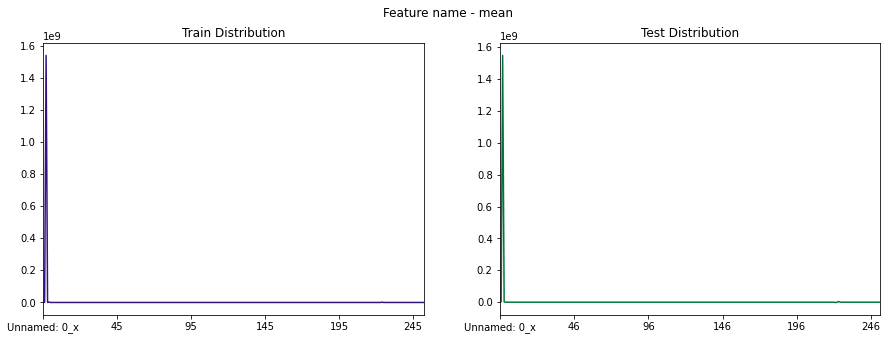

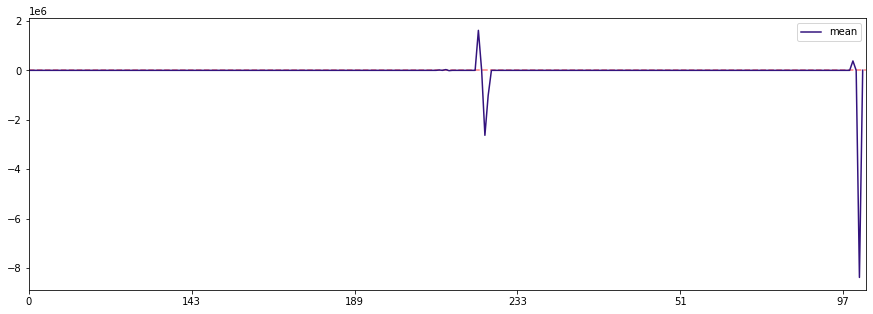

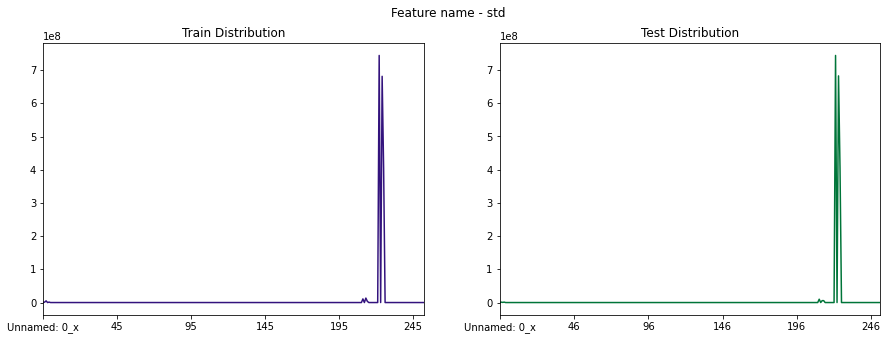

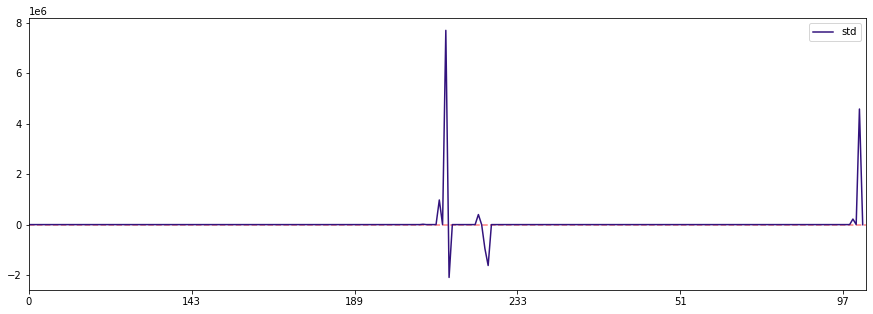

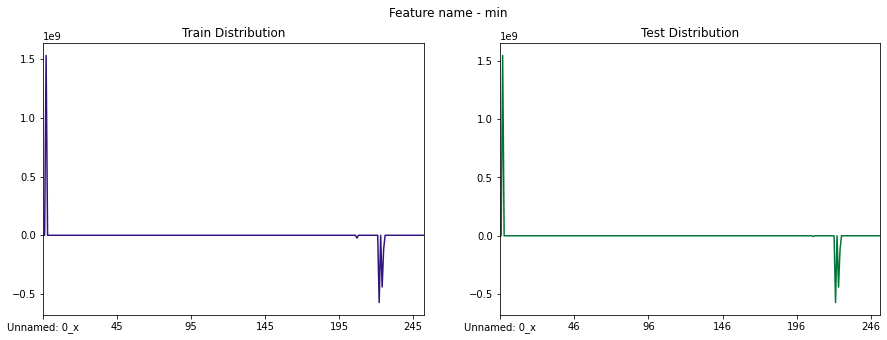

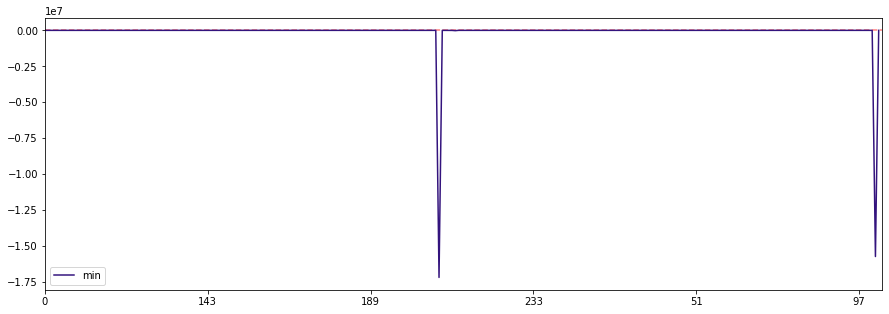

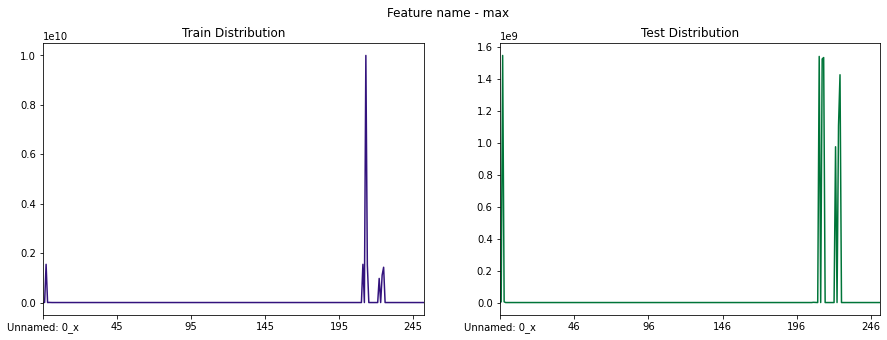

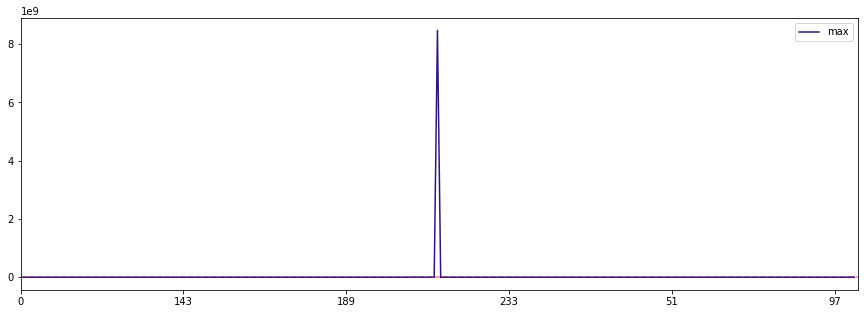

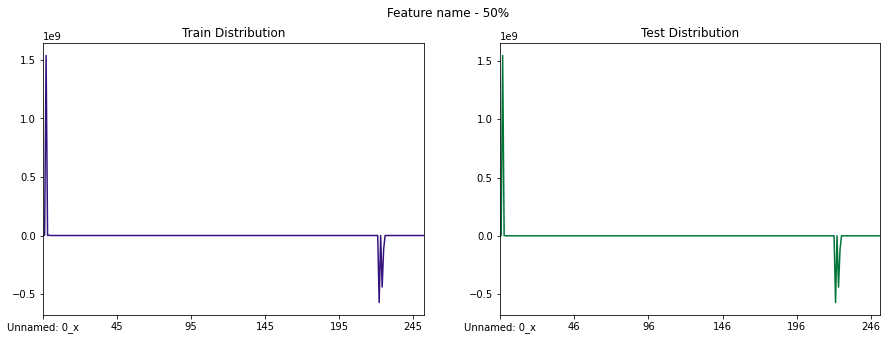

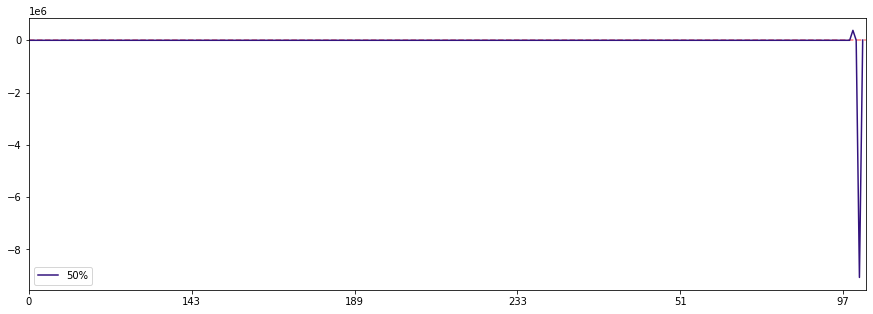

In [382]:
for feature in ["mean", "std", "min", "max", "50%"]:
    plot_stat_distribution(train_stats.loc[feature], test_stats.loc[feature])

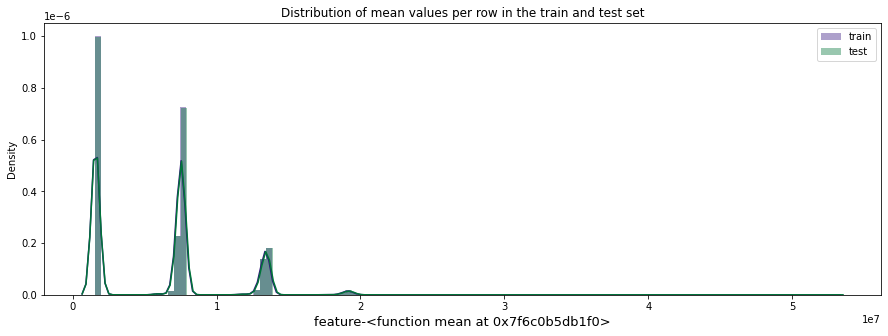

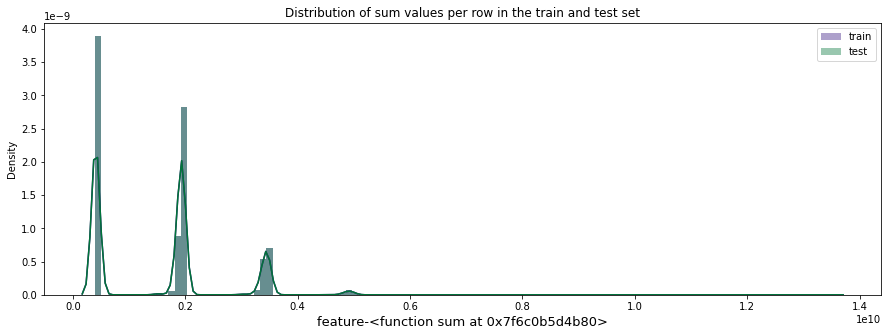

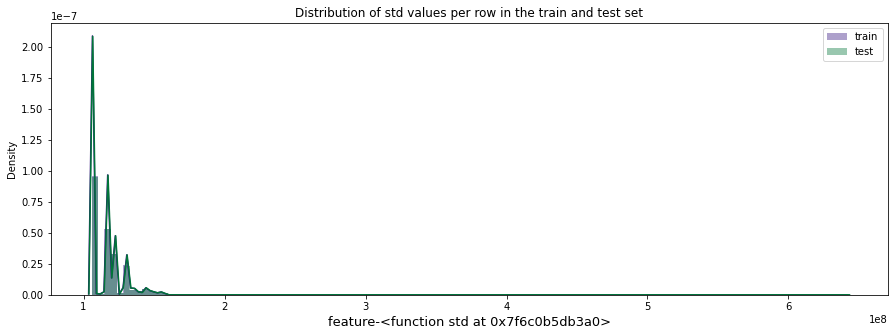

In [383]:
for func in [np.mean, np.sum, np.std]:
    plot_row_distribution(func, numerical_features_train, numerical_features_test)

На основе этой визуализации можно сделать несколько выводоы:

* Среднее значение и стандартное отклонение небольшое.

* распределения всех статистик на обучающих и на тестовых данных очень близки друг к другу.

* статистики по всем объектам сходятся, имеют одинаковое распределение. Выбросов по объектам, вероятно, нет.

## Анализ целевой переменной

Mean-target: 0.0724


Text(0, 0.5, 'Index')

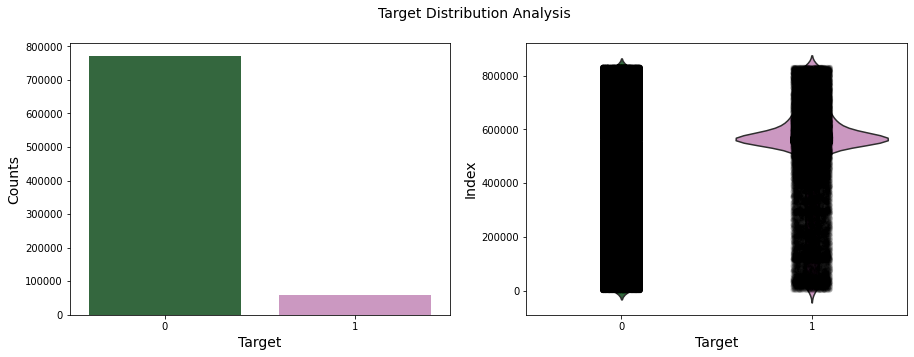

In [384]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle("Target Distribution Analysis", size=14)
print(f"Mean-target: {round(train.target.mean(), 4)}")

sns.countplot(train.target, ax=axes[0], palette="cubehelix")
sns.violinplot(train.target, train.index, ax=axes[1], palette="cubehelix")
sns.stripplot(train.target, train.index, jitter=True, ax=axes[1], color="black", alpha=0.05)

axes[0].set_xlabel("Target", fontsize=14)
axes[0].set_ylabel("Counts", fontsize=14)
axes[1].set_xlabel("Target", fontsize=14)
axes[1].set_ylabel("Index", fontsize=14)

Выводы о целевой переменной:

* Мы будем решать задачу бинарной классификации с дисбалансом целевой переменной. Количество клиентов, которые подключили услугу, намного меньше, чем клиентов, которые не подключили.

* На правом графике мы видим, что целевая переменная распределена равномерно по индексам датафрейма, кроме одного периода. Возможно здесь присутствует сезонная компонента.

## Анализ распределения признаков

In [385]:
features = [
    feature for feature in train.drop(["target"], axis=1).columns
]

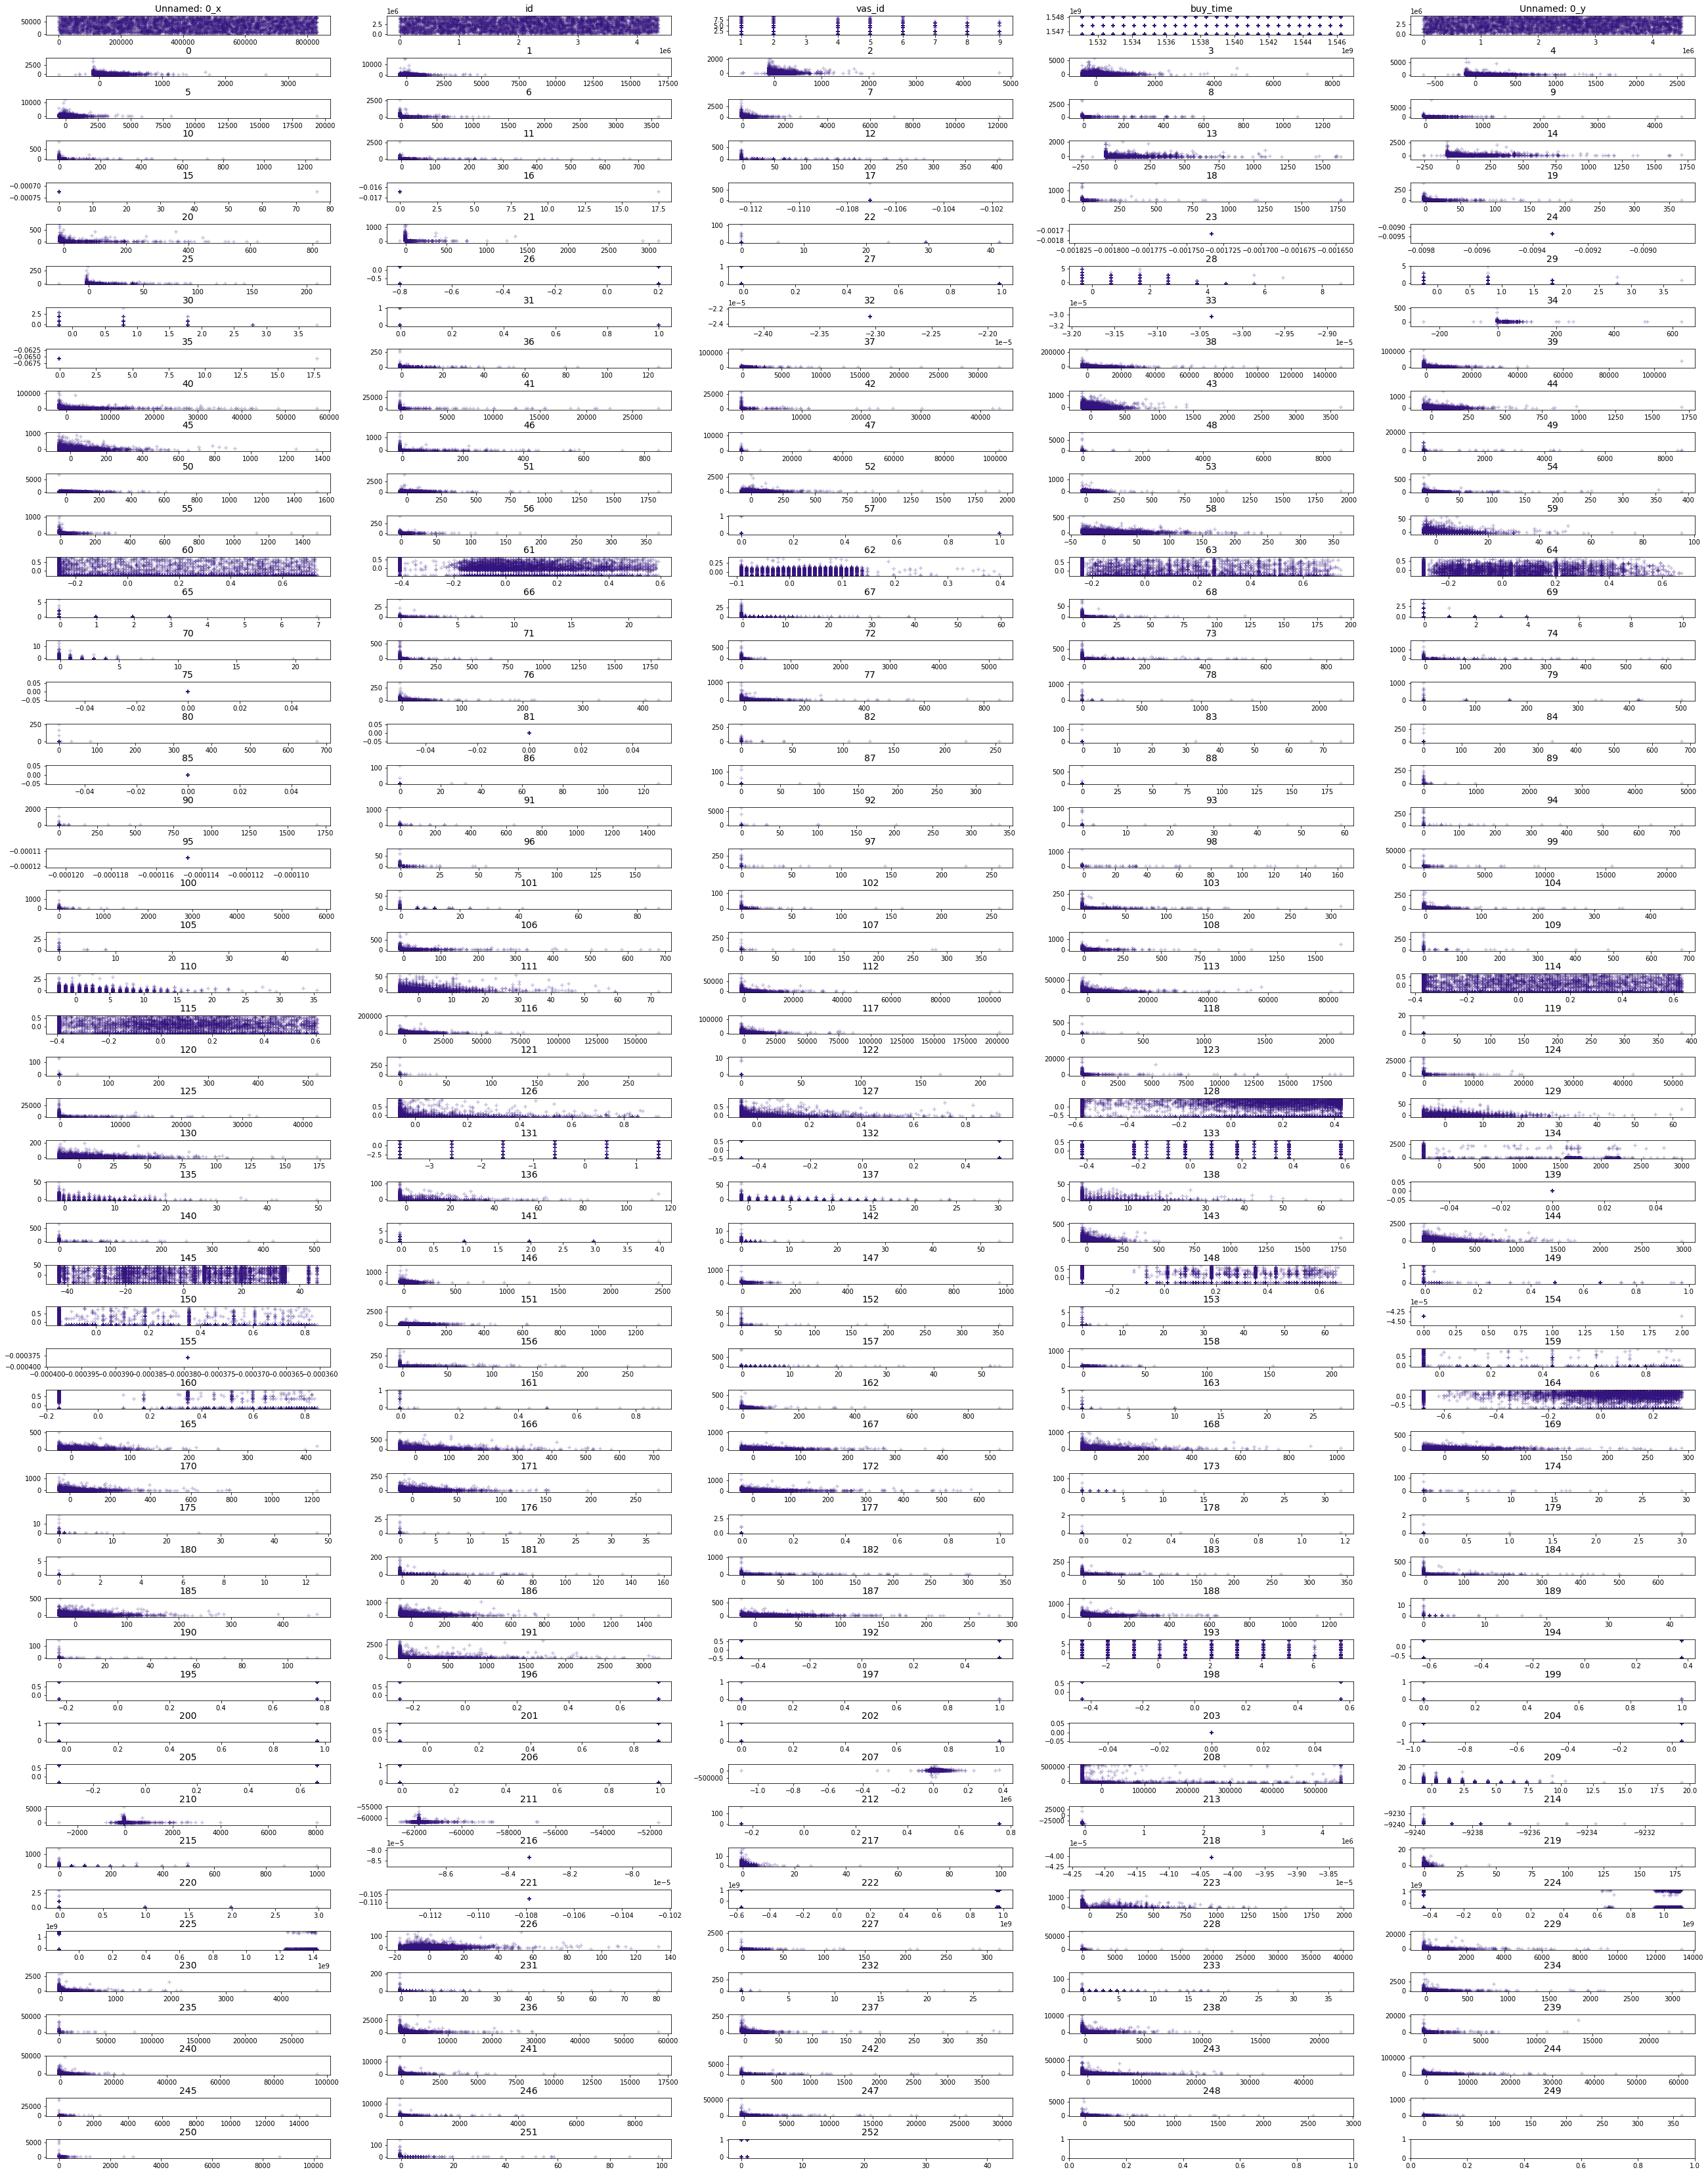

In [386]:
fig, axes = plt.subplots(52, 5, figsize=(45, 60))
fig.subplots_adjust(hspace=1.2)


for num, feature in enumerate(features, start=1):
    plt.subplot(52, 5, num)
    plt.title(f"{feature}", size=14)
    plt.scatter(
        train[feature].sample(5000),
        test[feature].sample(5000),
        color="#33137d",
        alpha=0.25,
        marker="+")

Распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки

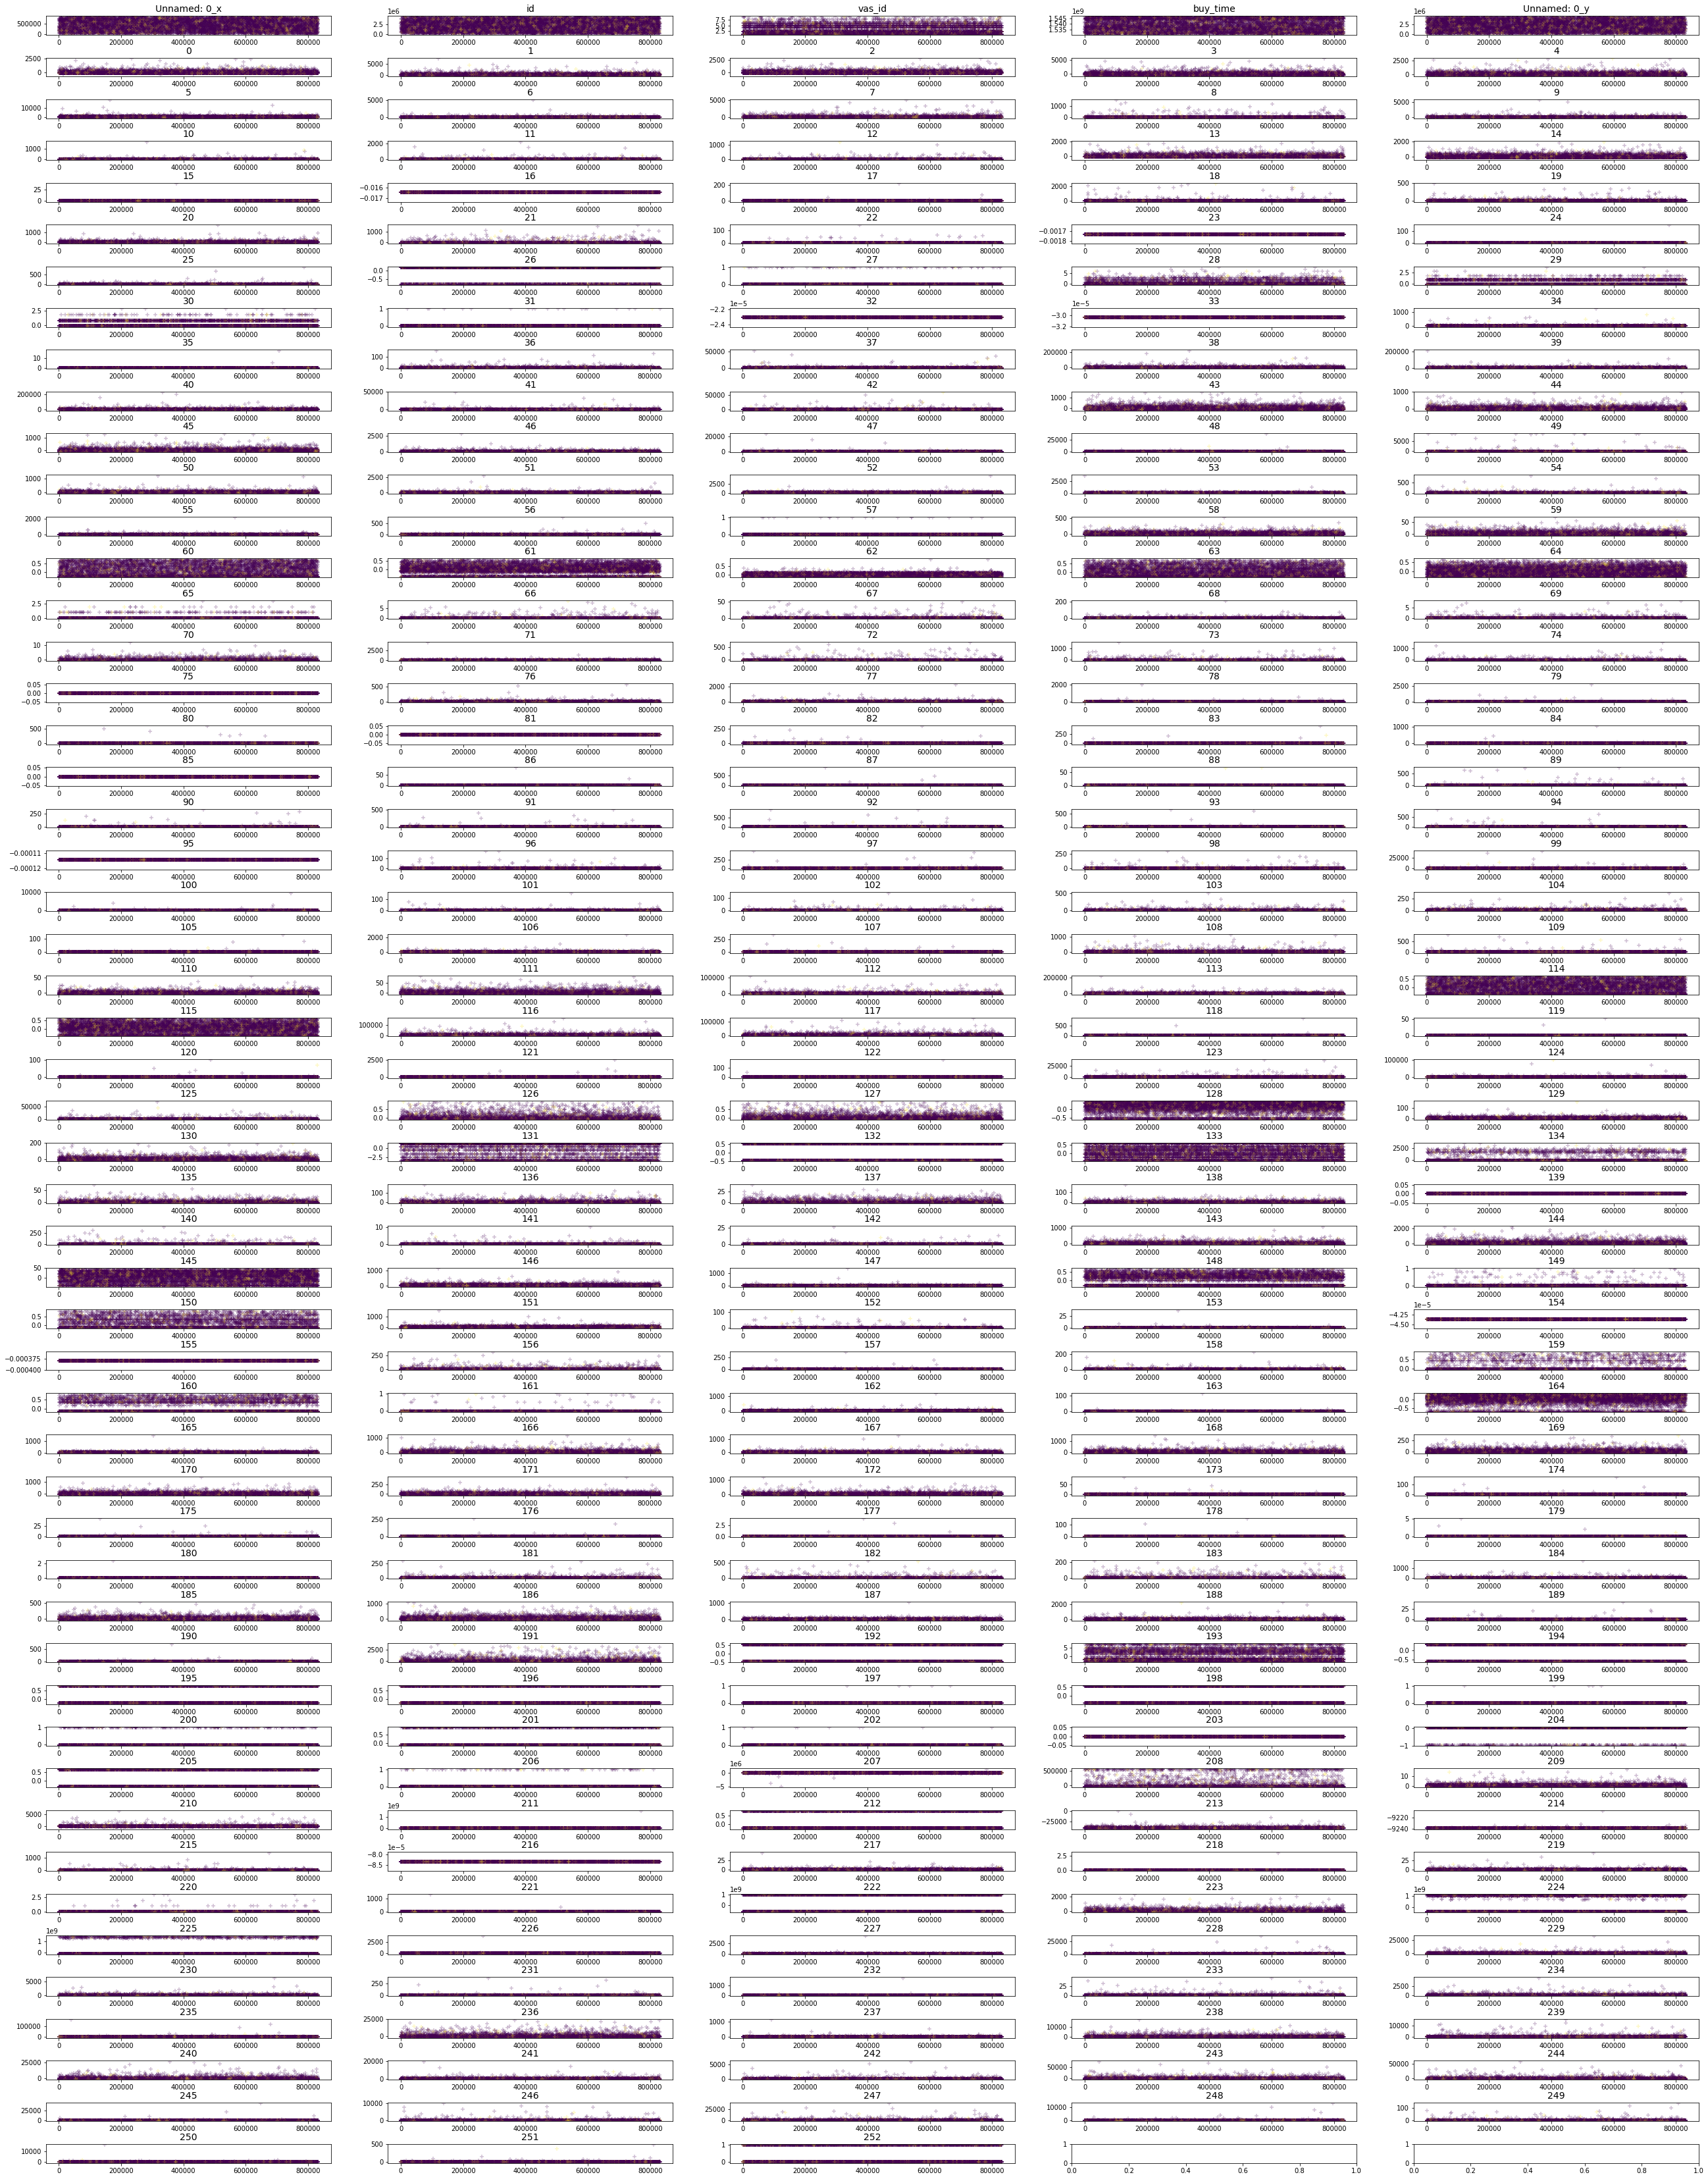

In [387]:
fig, axes = plt.subplots(52, 5, figsize=(45, 60))
fig.subplots_adjust(hspace=1.2)
for num, feature in enumerate(features, start=1):
    plt.subplot(52, 5, num)
    plt.title(f"{feature}", size=14)
    plt.scatter(
        train[feature].sample(10000).index,
        train[feature].sample(10000),
        c=train["target"].sample(10000),
        cmap="viridis",
        alpha=0.25,
        marker="+")

**Переменные, связанные со временем**

In [388]:
train['buy_time']=train['buy_time'].map(lambda x: dt.fromtimestamp(x))

In [389]:
train['buy_time'] = pd.to_datetime(train['buy_time'])

In [390]:
train['buy_time'].dt.year.value_counts()

2018    831653
Name: buy_time, dtype: int64

In [391]:
train['buy_time'].dt.month.value_counts()

12    247580
8     146804
9     138238
7     136679
10     88832
11     73520
Name: buy_time, dtype: int64

In [392]:
train['buy_time'].dt.dayofweek.value_counts()

6    831653
Name: buy_time, dtype: int64

In [393]:
month_target = train[['buy_time', 'target']]

In [394]:
month_target['buy_time'] = month_target['buy_time'].dt.month

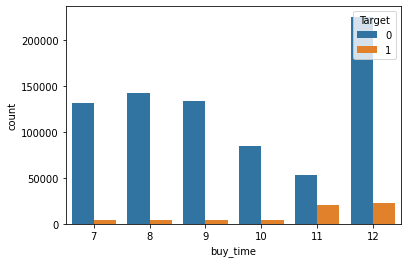

In [395]:
sns.countplot(x="buy_time", hue='target', data= month_target)
plt.legend(title='Target', loc='upper right')
plt.rcParams['figure.figsize']=(30,8)

In [396]:
test['buy_time']=test['buy_time'].map(lambda x: dt.fromtimestamp(x))

In [397]:
test['buy_time'] = pd.to_datetime(test['buy_time'])

In [398]:
test['buy_time'].dt.year.value_counts()

2019    71231
Name: buy_time, dtype: int64

In [399]:
test['buy_time'].dt.month.value_counts()

1    71231
Name: buy_time, dtype: int64

In [400]:
test['buy_time'].dt.dayofweek.value_counts()

6    71231
Name: buy_time, dtype: int64

Временные тренеровочные переменные представляют один год 2018, предложения делали по воскресеньям, в тренеровочном сете 6 месяцев в тестовом данные за 2019год за первый месяц.

**Числовые признаки**

In [401]:
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features 257


Index(['Unnamed: 0_x', 'id', 'target', 'Unnamed: 0_y', '0', '1', '2', '3', '4',
       '5',
       ...
       '243', '244', '245', '246', '247', '248', '249', '250', '251', '252'],
      dtype='object', length=257)

## Дескретные признаки

In [402]:
discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<25
]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 44


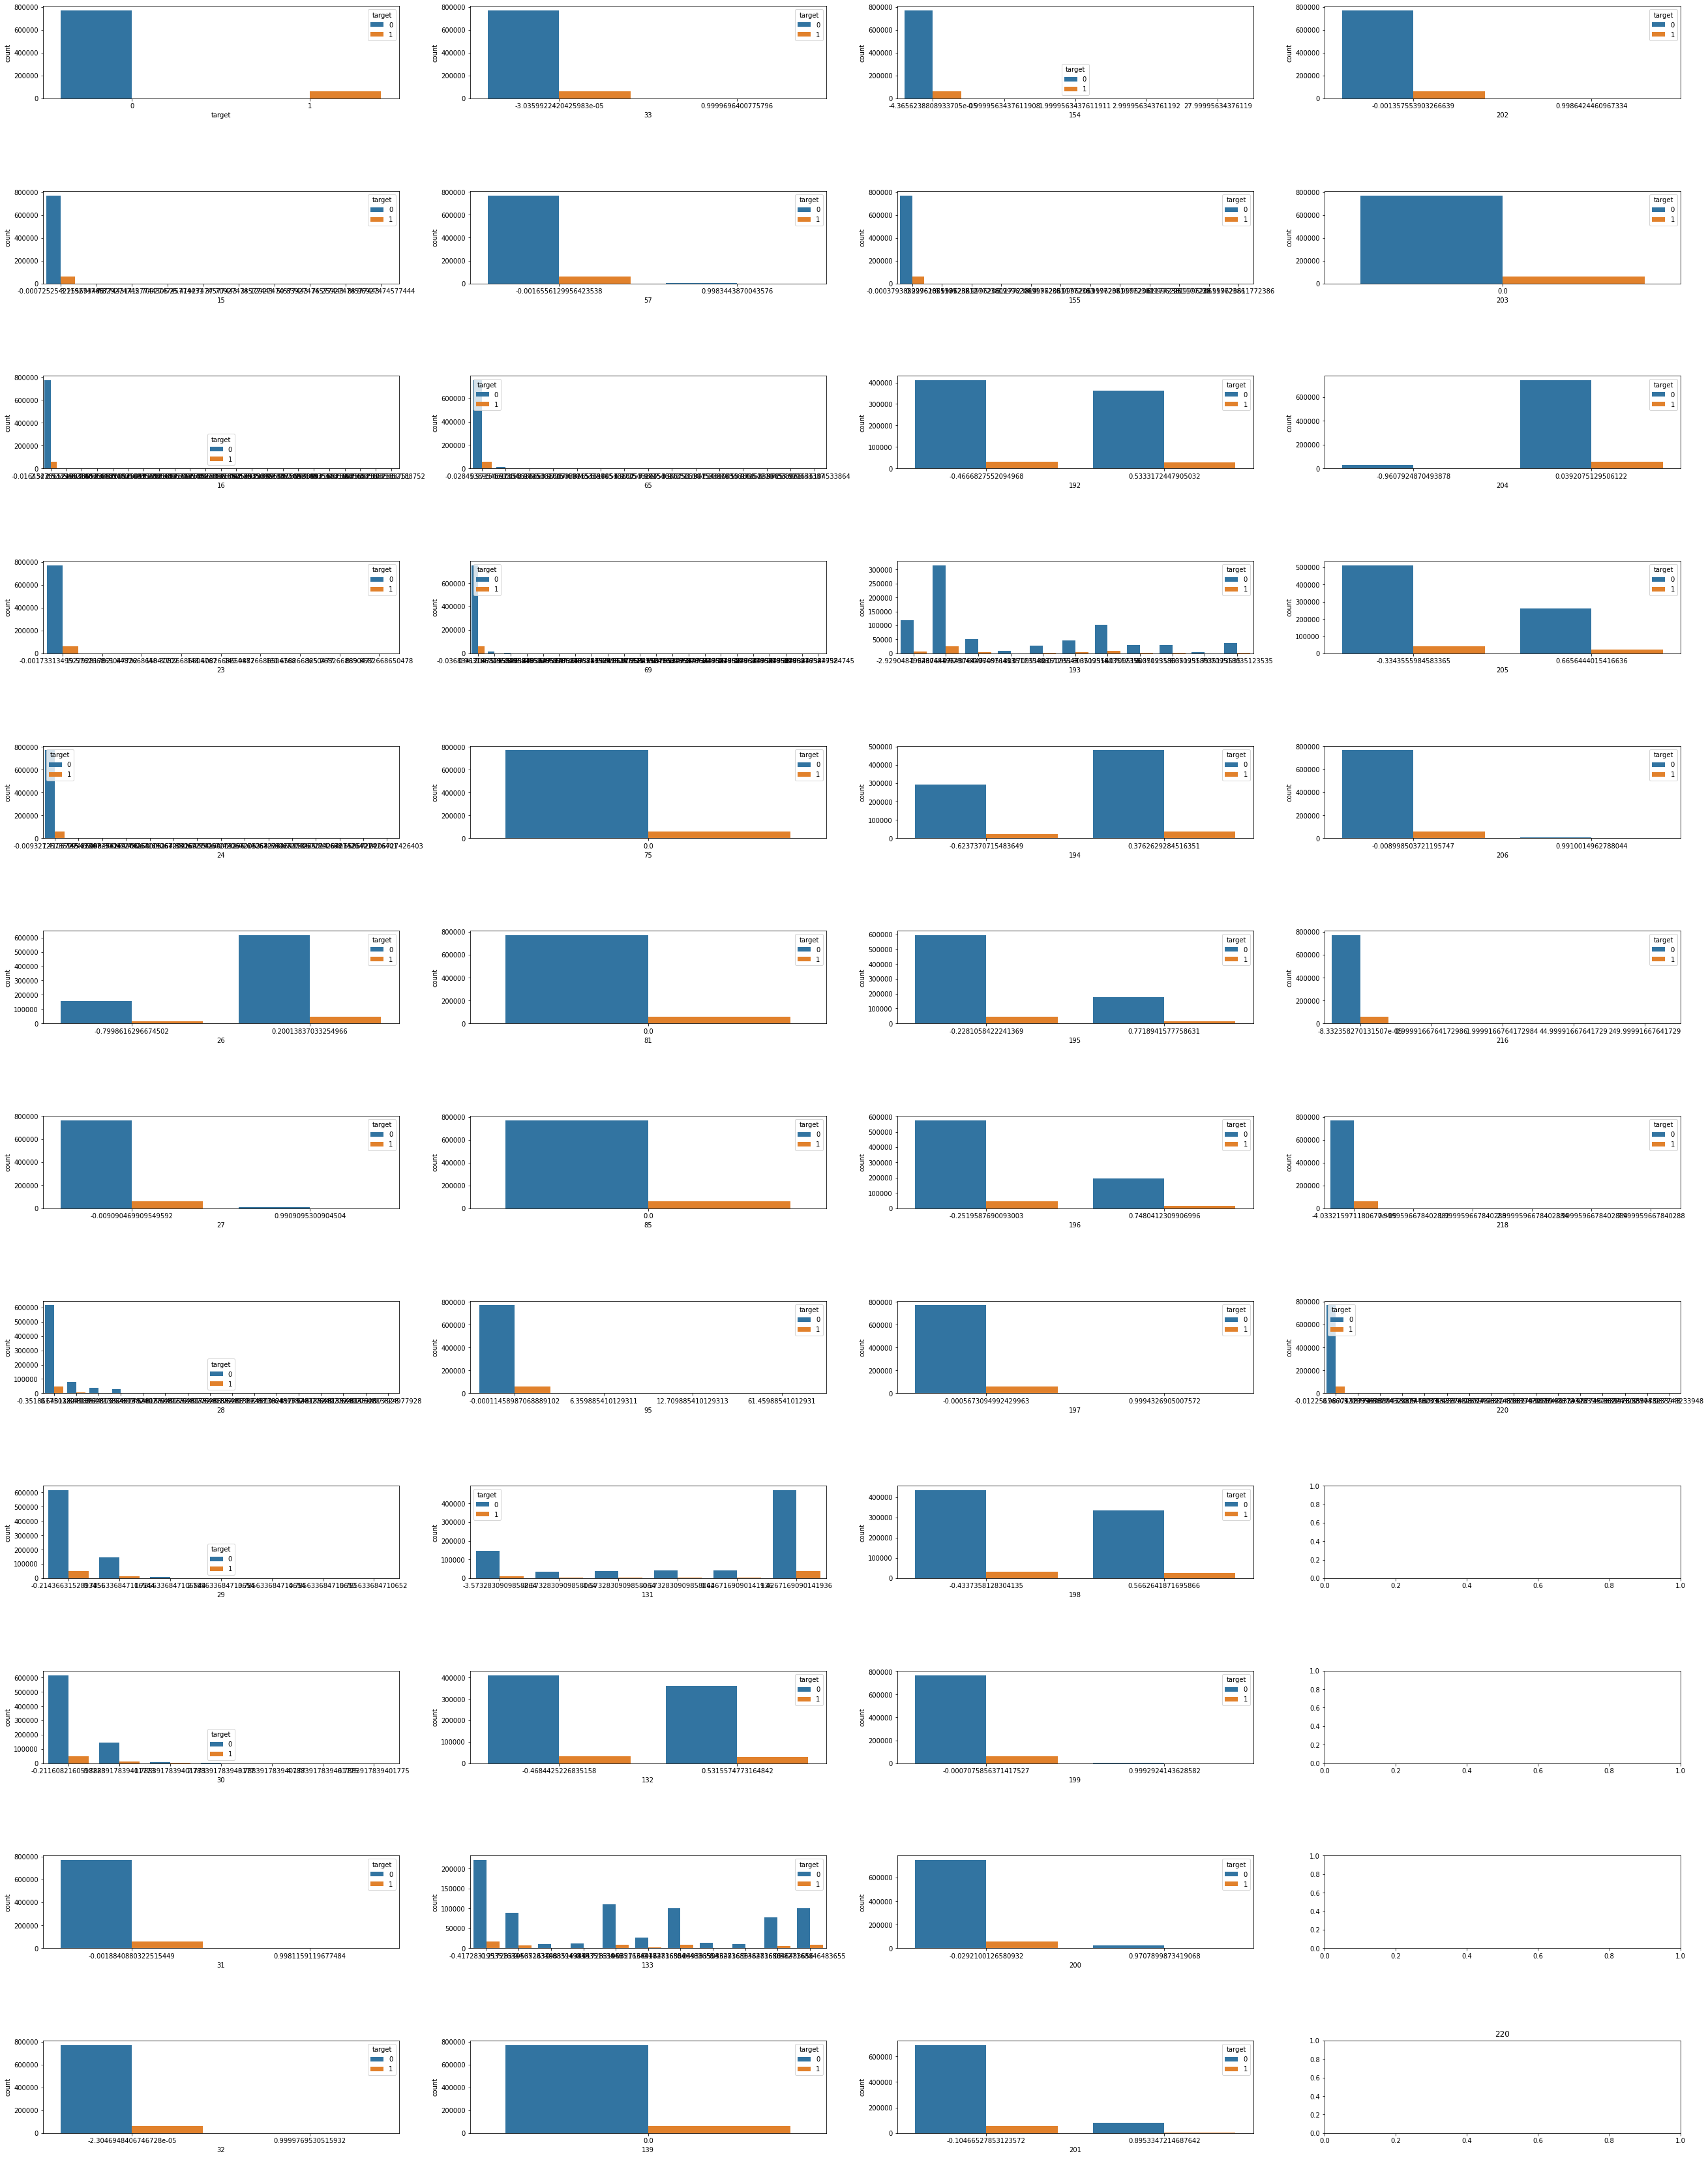

In [403]:
fig, axes = plt.subplots(12, 4, figsize=(45, 60))
fig.subplots_adjust(hspace=1)

for num, feature in enumerate(discrete_feature):
    data = train.copy()
    sns.countplot(x=feature, hue='target', data= train,  ax=axes[num%12, num//12])
    plt.title(feature)

       


In [404]:
train['139'].value_counts()

0.0    831653
Name: 139, dtype: int64

In [405]:
train['203'].value_counts()

0.0    831653
Name: 203, dtype: int64

Признаки 139,203 содержат в себе константы. Такие признаки мы удаляем. 20 признаков является бинарным. Мы их можем поменять на 0,1 и сделать их категориальными.

## Непрерывные признаки

In [406]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in discrete_feature + ["id"]]

print(f"Continuous Feature Count {len(continuous_feature)}")

Continuous Feature Count 212


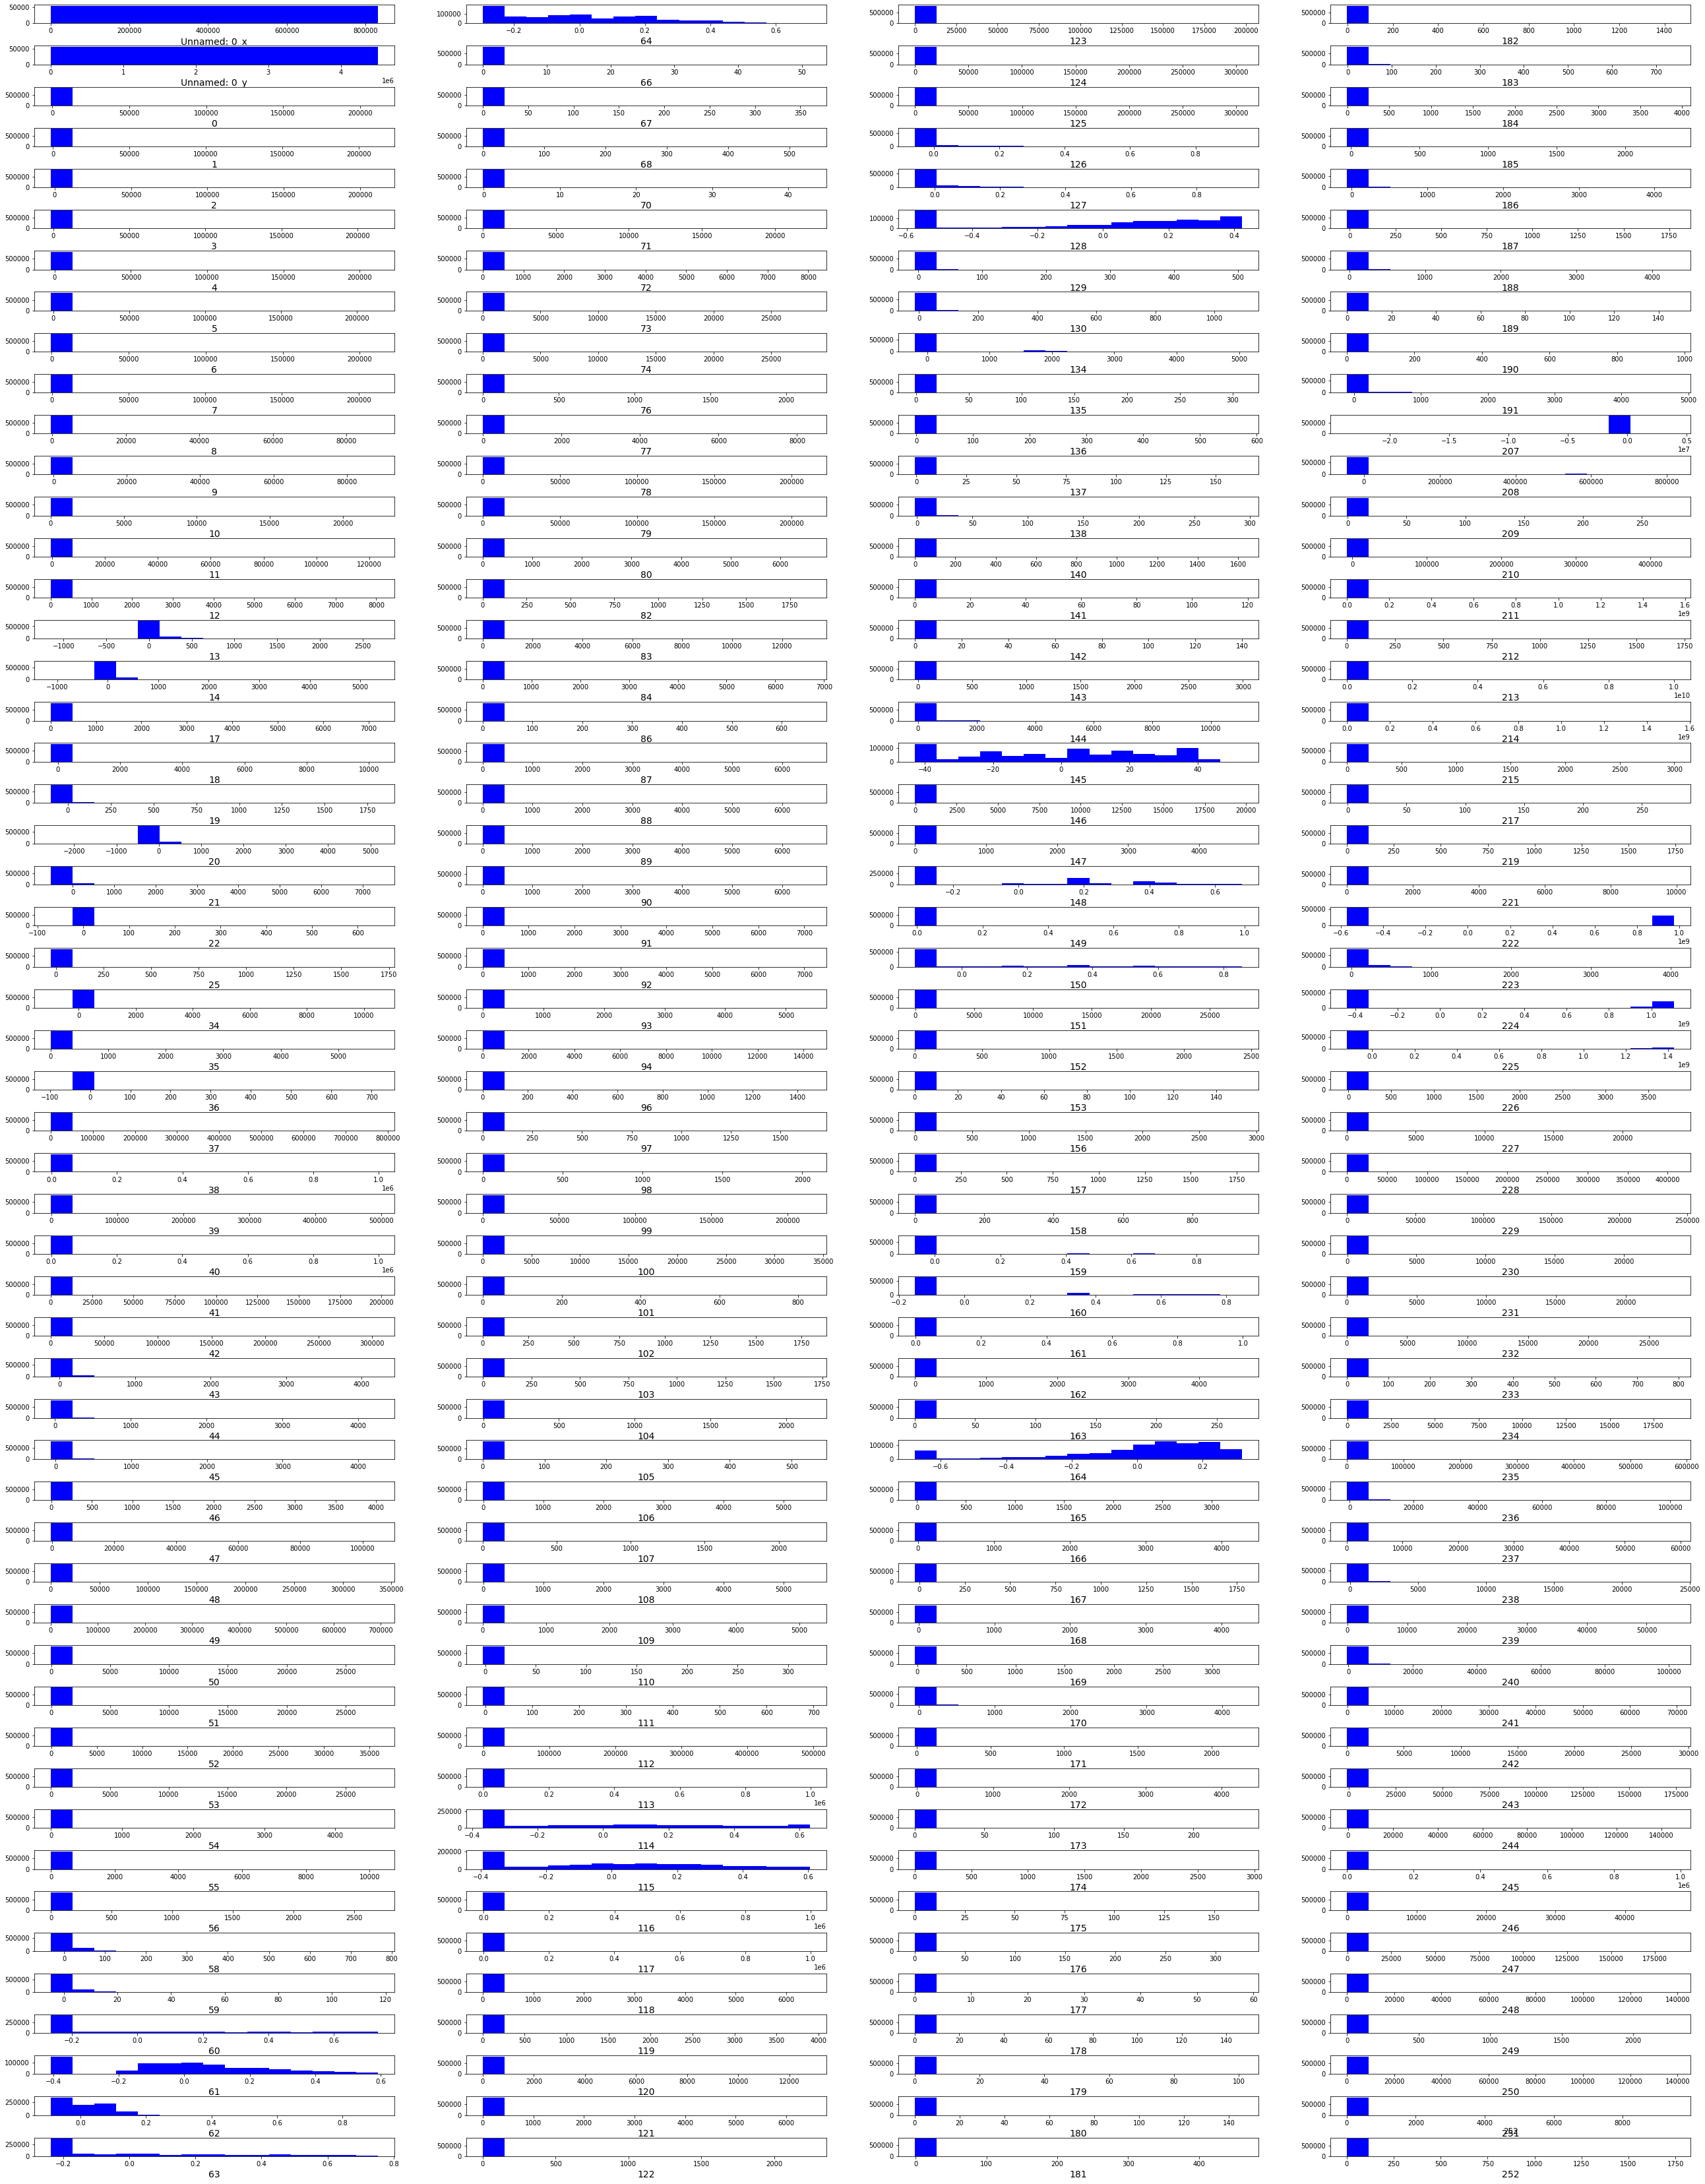

In [407]:
fig, axes = plt.subplots(53, 4, figsize=(45, 60))
fig.subplots_adjust(hspace=1.2)

for num, feature in enumerate(continuous_feature):
    data = train[feature].copy()
    axes[num%53, num//53].hist(data, bins=15, color="blue")
    axes[num%53, num//53].set_xlabel(feature, fontsize=14)
    plt.title(feature)


In [ ]:
Большинство признаков имеют равномерное распределение.

Зависимость непрерывного признака в разрезе целевой переменной. Кроме того, имеет смысл строить распределение __одновременно__ и для обучающей выборки, и для тестовой для понимания насколько отличаются распределения.

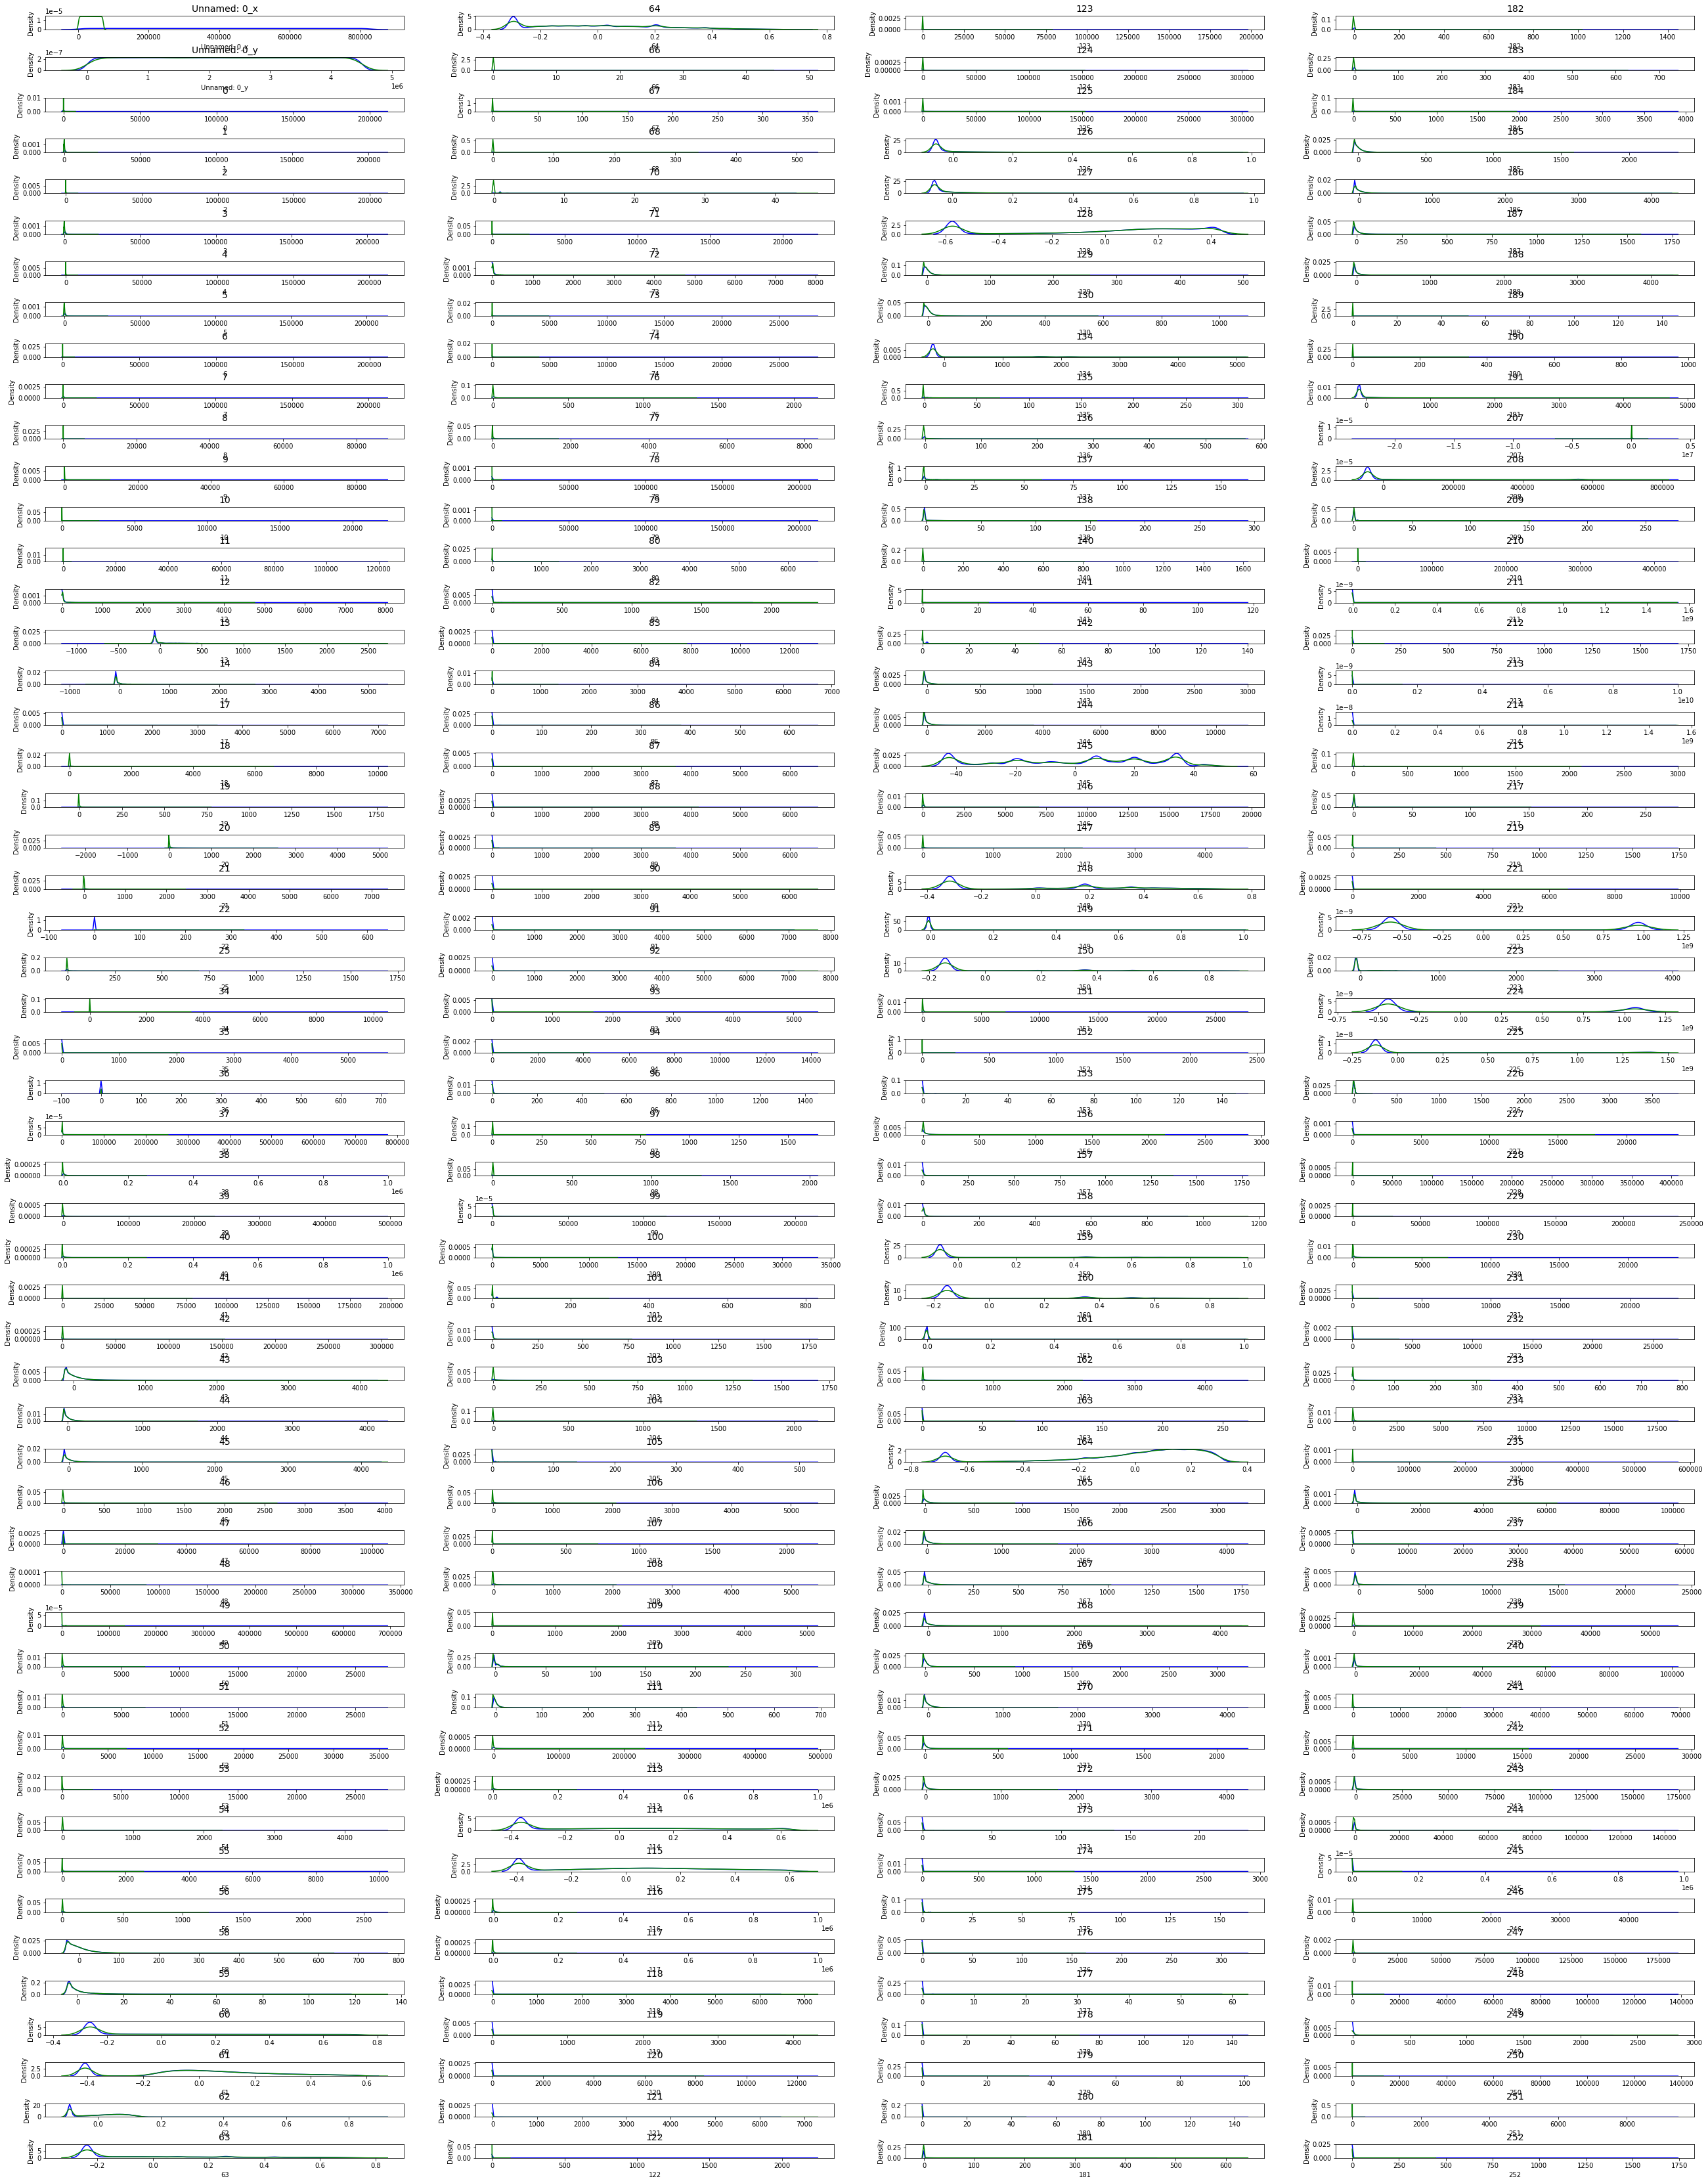

In [408]:
fig, axes = plt.subplots(53, 4, figsize=(45, 60))
fig.subplots_adjust(hspace=2)

for num, feature in enumerate(continuous_feature):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num%53, num//53], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num%53, num//53], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num%53, num//53], color="blue", label="train")
    axes[num%53, num//53].set_title(feature, fontsize=14)

## Категориальные признаки

In [409]:
categorical_features = train.select_dtypes(include=[np.object])
print(f"Categorical Feature Count {categorical_features.shape[1]}")
categorical_features.head(n=2)

Categorical Feature Count 1


vas_id
0      2
1      2

**Анализ пропусков**

In [410]:
train.isna().sum().sum()

0

In [411]:
test.isna().sum().sum()

0

Набор данных для обучения и для предсказания заполнен целиком, пропущенных значений нет.

## Корреляция

In [412]:
correlation = numerical_features.corr()


In [413]:
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

target          1.000000
Unnamed: 0_x    0.010123
193             0.008199
59              0.007133
224             0.007115
                  ...   
75                   NaN
81                   NaN
85                   NaN
139                  NaN
203                  NaN
Name: target, Length: 257, dtype: float64

Text(0, 0.5, 'Density')

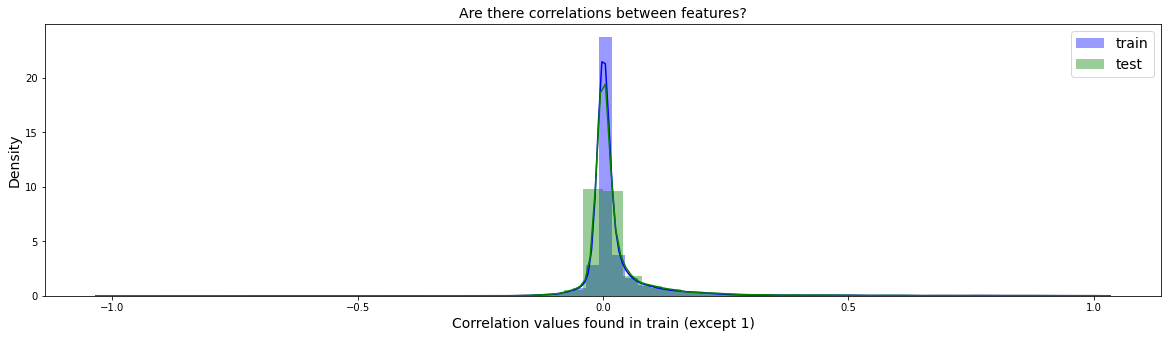

In [414]:
train_correlations = numerical_features.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("target")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

Распределение корреляции между тренеровочными и тестовыми данными не совпадают 

<AxesSubplot:title={'center':'Correlation of Numeric Features with target'}>

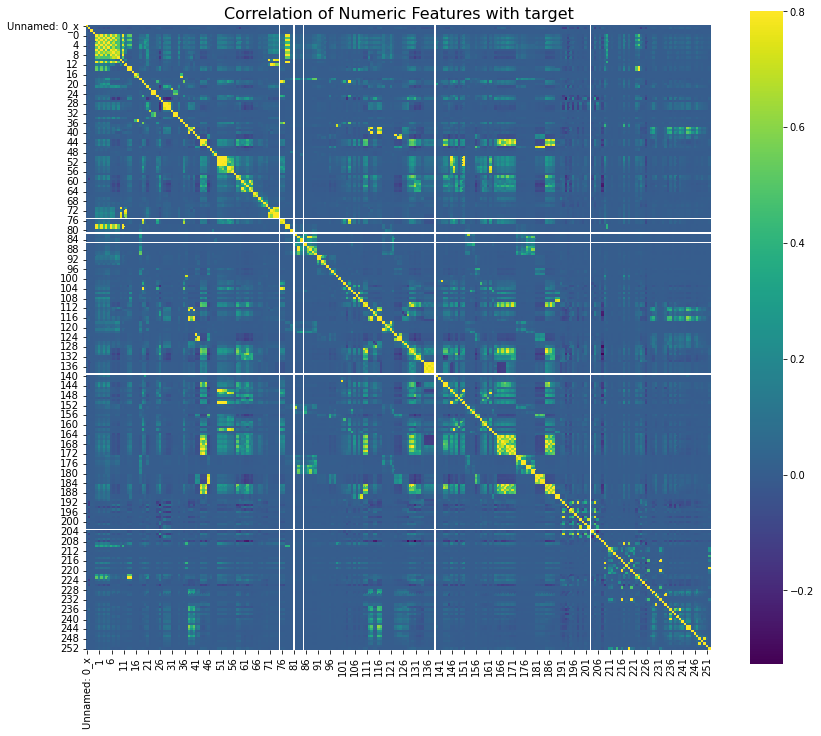

In [415]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with target", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

<AxesSubplot:>

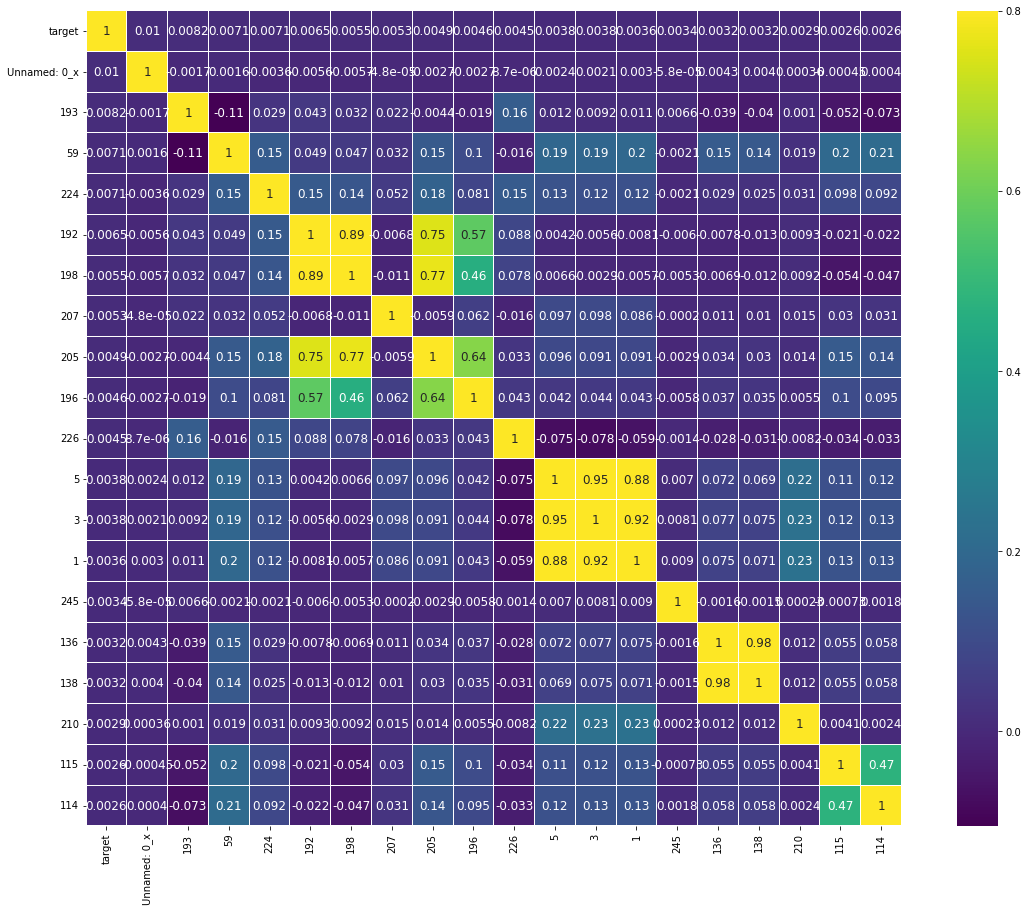

In [416]:
k = 20
cols = correlation.nlargest(k, "target")["target"].index
cm = np.corrcoef(train[cols].values.T)
fig, axes = plt.subplots(figsize = (20, 15))

sns.heatmap(
    cm,
    vmax=.8,
    linewidths=0.01,
    cmap="viridis",
    square=True,
    annot=True,
    linecolor="white",
    xticklabels=cols.values,
    annot_kws = {"size": 12},
    yticklabels=cols.values
)

__Короткие выводы:__

* Между признаками и `target` отсутствует сильная линейная связь

* Распределение корреляции между тренеровочными и тестовыми данными не совпадают

* Высокая линейная корреляция наблюдается между признаками 5,3,1 и 136, 138. Следовательно, в нашем анализе нам нужна только одна из этих переменных (мы можем оставить 5, поскольку ее корреляция с `target` выше и 5).




## Нелинейная связь между признаками

In [420]:
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestClassifier(**parameters)
forest.fit(train.drop(["Unnamed: 0_x", "Unnamed: 0_y", "target",'buy_time'], axis=1), train['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=27, verbose=0,
                       warm_start=False)

Text(0.5, 1.0, 'What are the top important features to start with?')

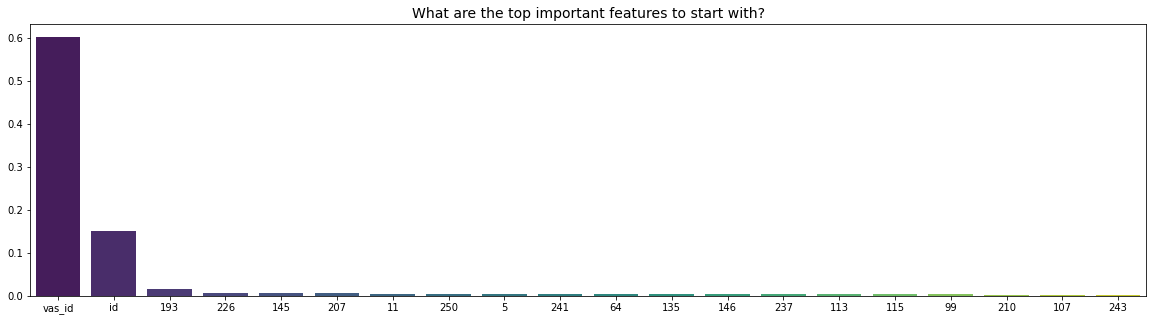

In [421]:
n_top = 20
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = train.drop(["Unnamed: 0_x", "Unnamed: 0_y", "target",'buy_time'], axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)